In [314]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

In [315]:
housing =pd.read_csv("D:\\Harshit Sethi\\Data Science CreTEch Internship\\Housing Price Prediction\\Housing.csv")


In [316]:
# Check the head of the dataset
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [317]:
housing.shape

(545, 13)

In [318]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [319]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [320]:
# Data Cleaning
# Checking Null values
housing.isnull().sum()*100/housing.shape[0]
# There are no NULL values in the dataset, hence it is clean.

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [321]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

In [322]:
# Outlier Treatment
# Price and area have considerable outliers.
# We can drop the outliers as we have sufficient data.

In [323]:
# outlier treatment for price
plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

In [324]:
# outlier treatment for area
plt.boxplot(housing.area)
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]


In [325]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (7,3))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

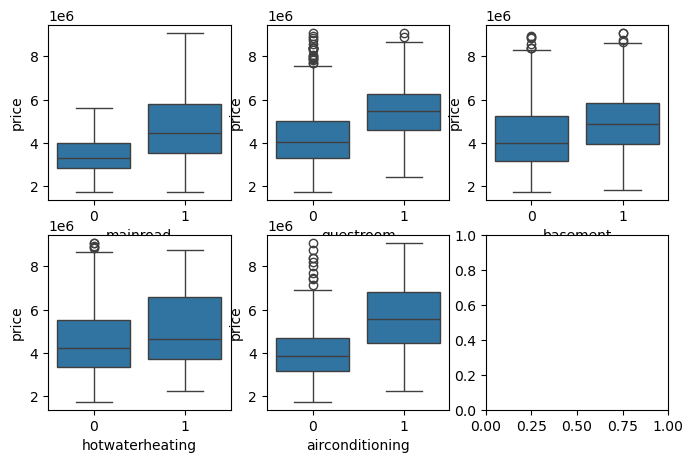

<Figure size 700x300 with 0 Axes>

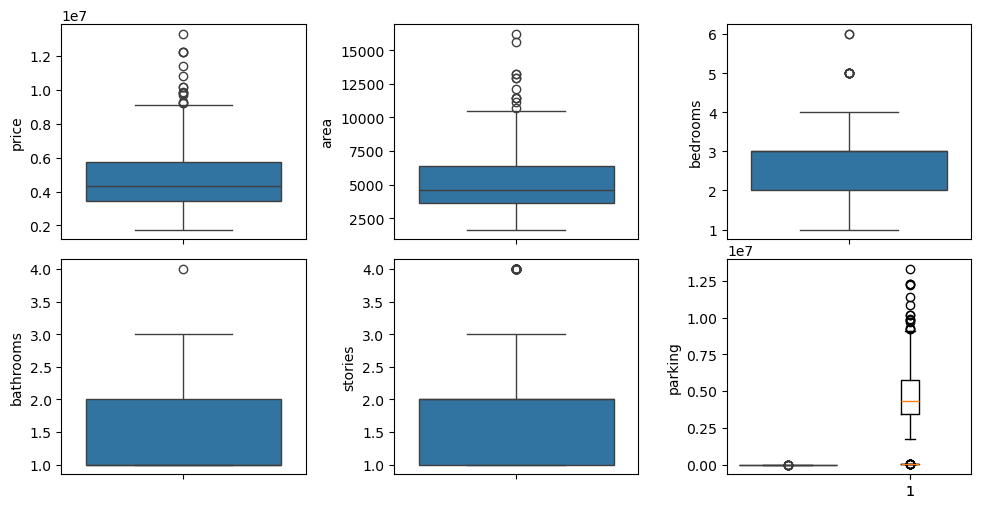

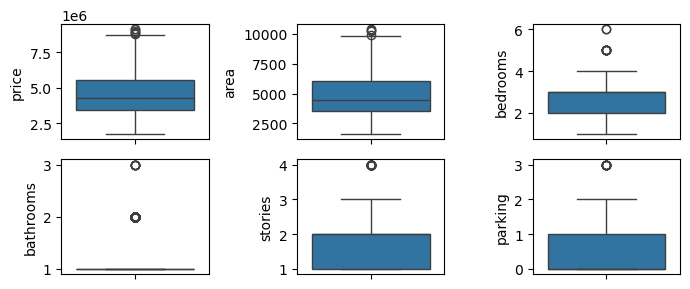

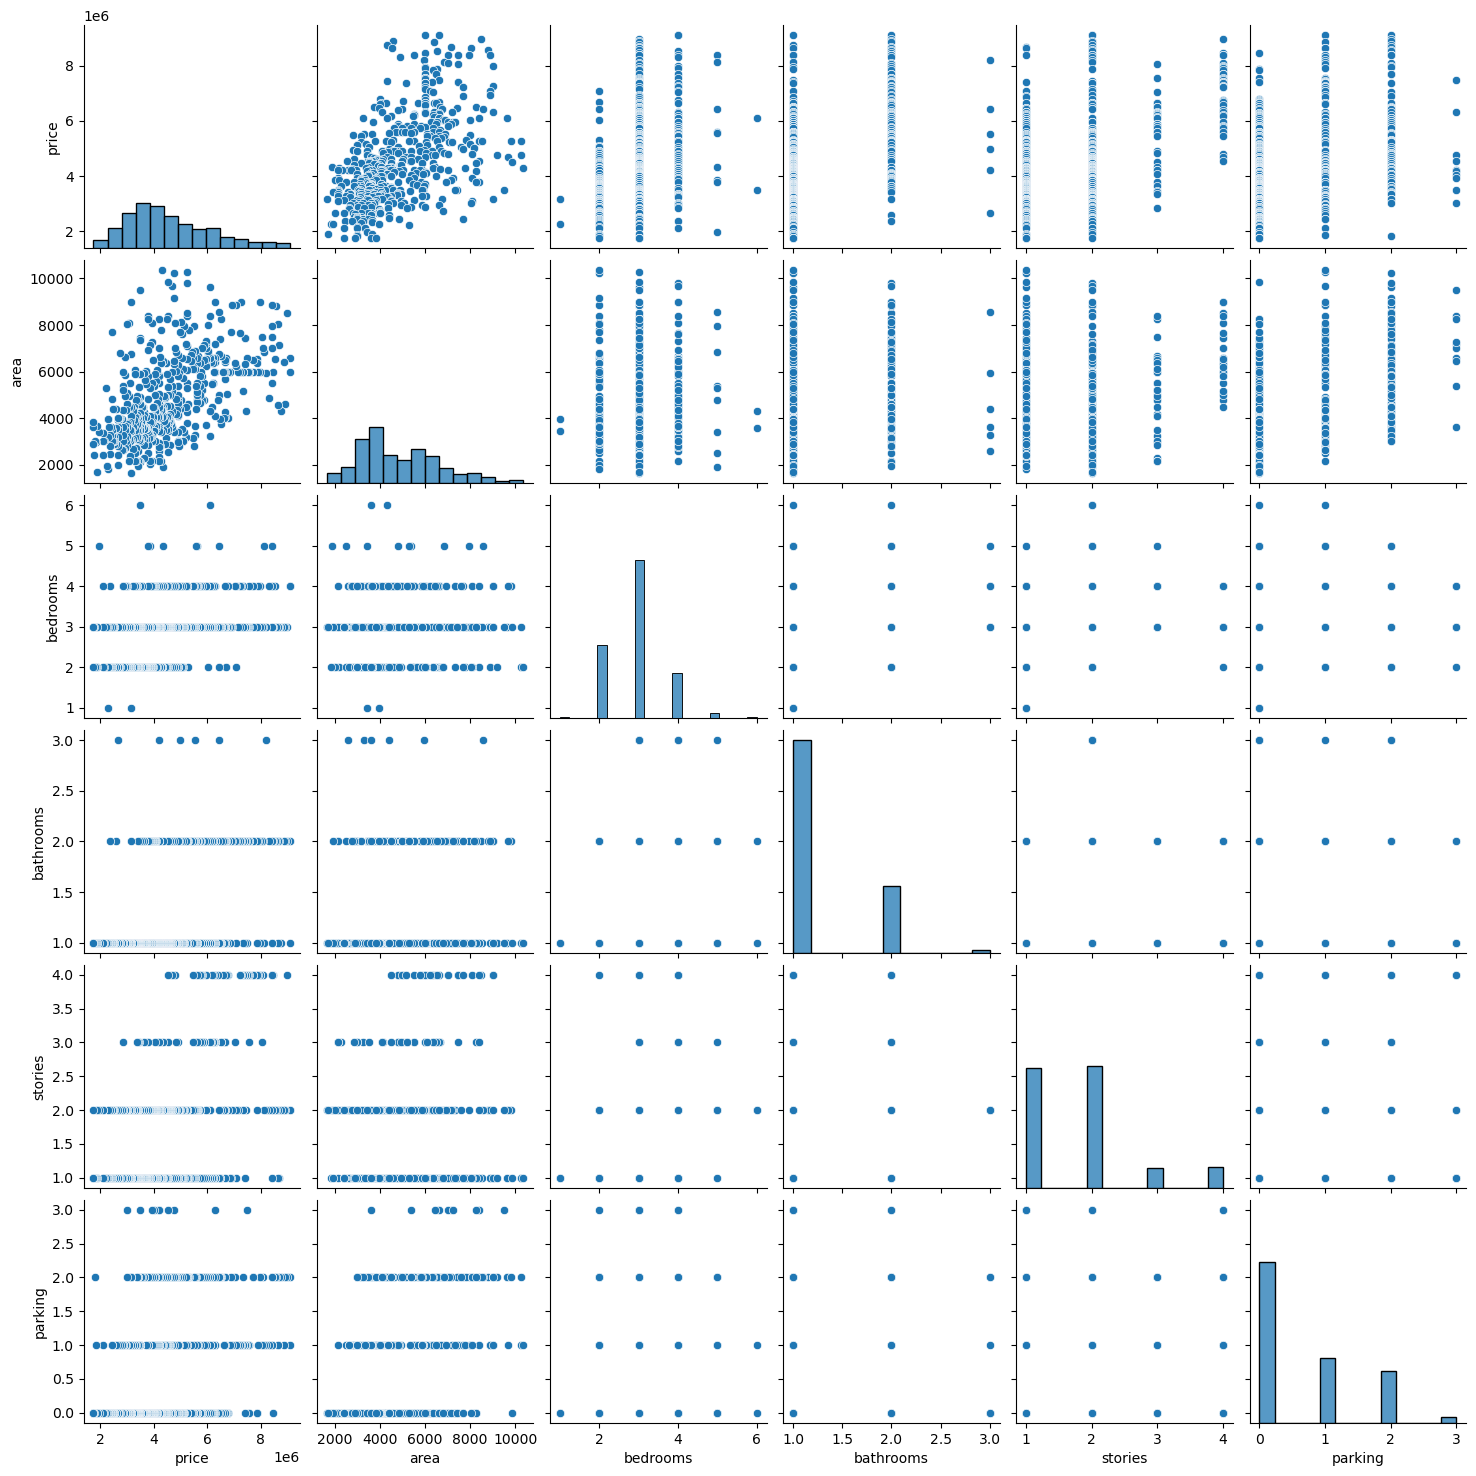

In [326]:
# Visualising Numeric Variables¶
# Let's make a pairplot of all the numeric variables

sns.pairplot(housing)
plt.show()


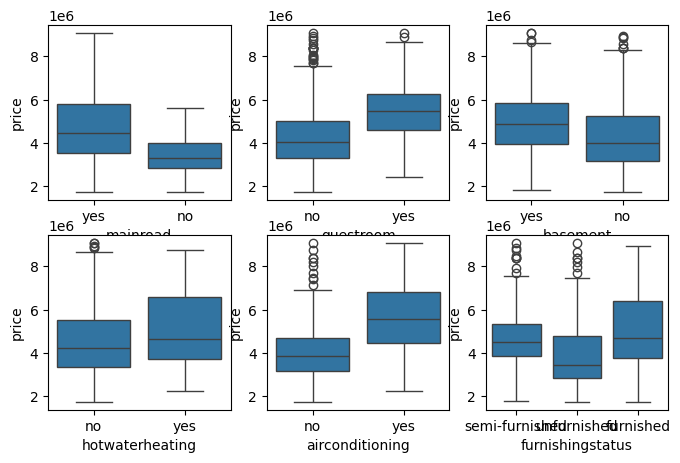

In [327]:
# Visualising Categorical Variables
# As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

plt.figure(figsize=(8, 5))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

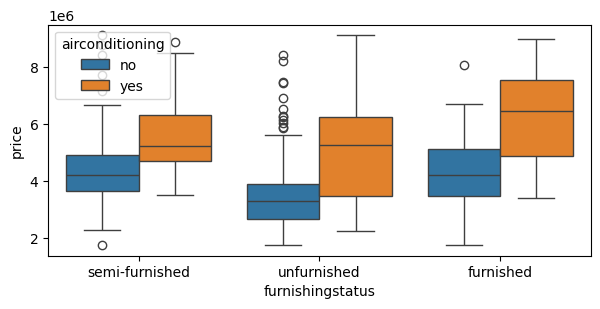

In [328]:
# We can also visualise some of these categorical features parallely by using the hue argument. Below is the plot for furnishingstatus with airconditioning as the hue.

plt.figure(figsize = (7, 3))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()

In [329]:
# Data Preparation
# You can see that your dataset has many columns with values as 'Yes' or 'No'.
# But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [330]:
# Check the housing dataframe now

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [331]:
# Dummy Variables
# The variable furnishingstatus has three levels. We need to convert these levels into integer as well.
# For this, we will use something called dummy variables.

# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(housing['furnishingstatus'])

In [332]:
# Check what the dataset 'status' looks like
status.head()

,furnished,semi-furnished,unfurnished
15,False,True,False
16,False,False,True
17,True,False,False
18,True,False,False
19,False,True,False


In [333]:
# Now, you don't need three columns. You can drop the furnished column, as the type of furnishing can be identified with just the last two columns where —

# 00 will correspond to furnished
# 01 will correspond to unfurnished
# 10 will correspond to semi-furnished
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)


In [334]:
# Add the results to the original housing dataframe

housing = pd.concat([housing, status], axis = 1)

In [335]:
# Now let's see the head of our dataframe.

housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,True,False
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,False,True
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,False,False
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,False,False
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,True,False


In [336]:
# Drop 'furnishingstatus' as we have created the dummies for it

housing.drop(['furnishingstatus'], axis = 1, inplace = True)

In [337]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,True,False
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,False,True
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,False,False
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,False,False
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,True,False


In [338]:
# Splitting the Data into Training and Testing Sets¶

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [339]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [340]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [341]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
148,0.523810,0.526907,0.4,0.0,0.666667,1,0,0,0,0,0.000000,1,True,False
236,0.390476,0.114134,0.2,0.0,0.333333,1,1,1,0,0,0.000000,1,True,False
356,0.275238,0.072738,0.8,0.5,0.000000,0,0,1,0,1,0.333333,0,False,False
425,0.219048,0.151390,0.2,0.0,0.000000,1,0,1,0,0,0.666667,0,False,False
516,0.095238,0.157895,0.2,0.0,0.000000,0,1,0,0,0,0.333333,0,False,True


In [342]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.383701,0.350081,0.390582,0.127424,0.268698,0.875346,0.168975,0.349030,0.038781,0.313019,0.218837,0.207756
std,0.209712,0.207184,0.149146,0.224465,0.287833,0.330784,0.375250,0.477325,0.193341,0.464366,0.287286,0.406264
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.237143,0.189829,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.338095,0.295092,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.514286,0.491425,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


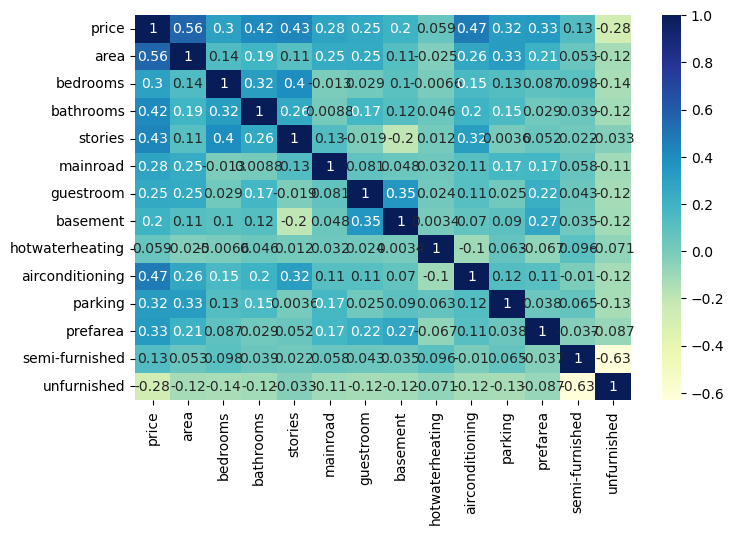

In [343]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (8, 5))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [344]:
# Dividing into X and Y sets for the model building
y_train = df_train.pop('price')
X_train = df_train

In [345]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [346]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [347]:
rfe = RFE(estimator=lm, n_features_to_select=6)
rfe = rfe.fit(X_train, y_train)

In [348]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 7),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 5),
 ('guestroom', False, 6),
 ('basement', False, 4),
 ('hotwaterheating', False, 2),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 8),
 ('unfurnished', False, 3)]

In [349]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'airconditioning', 'parking',
       'prefarea'],
      dtype='object')

In [350]:
X_train.columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [351]:
# Building model using statsmodel, for the detailed statistics
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [352]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [353]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model


In [354]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     92.83
Date:                Thu, 03 Jul 2025   Prob (F-statistic):           1.31e-69
Time:                        20:16:44   Log-Likelihood:                 222.77
No. Observations:                 361   AIC:                            -431.5
Df Residuals:                     354   BIC:                            -404.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1097      0.015     

In [355]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [356]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.51
1,area,1.24
4,airconditioning,1.20
3,stories,1.17
5,parking,1.14
2,bathrooms,1.12
6,prefarea,1.05


In [357]:
# Residual Analysis of the train data
y_train_price = lm.predict(X_train_rfe)
res = (y_train_price - y_train)

In [358]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\DELL\AppData\Local\Temp\ipykernel_14252\590015949.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_price), bins = 20)


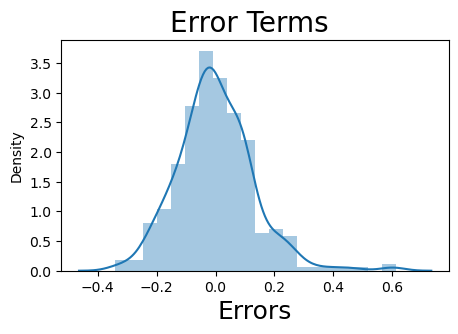

In [359]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(5, 3))
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

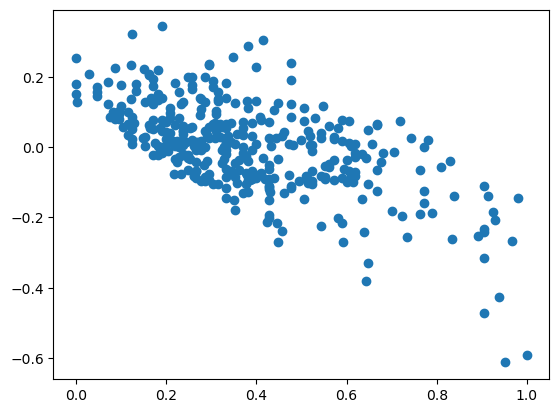

In [360]:
plt.scatter(y_train,res)
plt.show()

In [361]:
# Model Evaluation
# Applying the scaling on the test sets¶
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [362]:
# Dividing into X_test and y_test¶
y_test = df_test.pop('price')
X_test = df_test

In [363]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [364]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_rfe.columns]

In [365]:
# Making predictions
y_pred = lm.predict(X_test_rfe)

In [366]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.5791247774397738

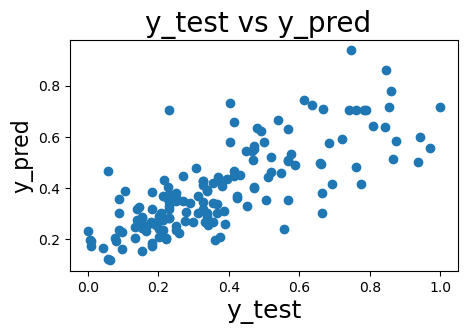

In [367]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(5, 3))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [368]:
# We can see that the equation of our best fitted line is:

# price=0.35×area+0.20×bathrooms+0.19×stories+0.10×airconditioning+0.10×parking+0.11×prefarea